['At iteration '0' the best fitness is '0.03439563643333935']
['At iteration '1' the best fitness is '0.039955828205617896']
['At iteration '2' the best fitness is '0.039955828205617896']
['At iteration '3' the best fitness is '0.039955828205617896']
['At iteration '4' the best fitness is '0.039955828205617896']
['At iteration '5' the best fitness is '0.09431111308539834']
['At iteration '6' the best fitness is '0.09431111308539834']
['At iteration '7' the best fitness is '0.16953065130693354']
['At iteration '8' the best fitness is '0.16953065130693354']
['At iteration '9' the best fitness is '0.16953065130693354']
['At iteration '10' the best fitness is '0.16953065130693354']
['At iteration '11' the best fitness is '0.16953065130693354']
['At iteration '12' the best fitness is '0.16953065130693354']
['At iteration '13' the best fitness is '0.2935800370041273']
['At iteration '14' the best fitness is '0.2935800370041273']
['At iteration '15' the best fitness is '0.2935800370041273']
[

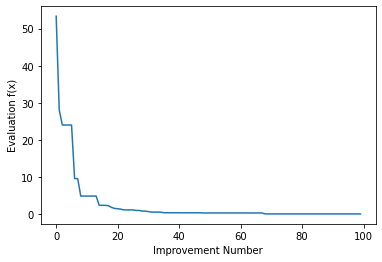

In [17]:
# differential evolution search of the two-dimensional sphere objective function
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmax
from numpy import min
from numpy import around
from matplotlib import pyplot
import math
import sys

# define objective function
def obj(data): 
    s1 = 0.
    s2 = 1.
    for k, x in enumerate(data):
        s1 = s1 + x ** 2
        s2 = s2 * math.cos(x/math.sqrt(k+1))
    y = (1./4000.) * s1-s2 + 1
    return 1./(1+y)


# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])


# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound


# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial


def differential_evolution(pop_size, bounds, iter, F, cr):
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    obj_all = [obj(ind) for ind in pop]
    best_obj = max(obj_all)
    prev_obj = best_obj
    obj_iter = list()
    for i in range(iter):
        if best_obj > prev_obj:
            prev_obj = best_obj
        obj_iter.append(best_obj)
        for j in range(pop_size):
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            mutated = mutation([a, b, c], F)
            mutated = check_bounds(mutated, bounds)
            trial = crossover(mutated, pop[j], len(bounds), cr)
            obj_target = obj(pop[j])
            obj_trial = obj(trial)
            if obj_trial > obj_target:
                pop[j] = trial
                obj_all[j] = obj_trial
        best_obj = max(obj_all)
        print("\r['At iteration '"+ str(i)+ "' the best fitness is '"+ str(best_obj)+"']")
    return obj_iter


pop_size = 30
bounds = asarray([(-600, 600)]*5)
iter = 100
F = 0.5
cr = 0.7

solution = differential_evolution(pop_size, bounds, iter, F, cr)
# # line plot of best objective function values
pyplot.plot([(1-d)/d for d in solution])
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()